<a href="https://colab.research.google.com/github/andipasti/smupo/blob/main/Ticket_Dynamic_Clustering_05_24_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MASTER THESIS

### INITIALIZATION

In [200]:
#SETTING GLOBALS


DF_SMALL = './drive/Othercomputers/X1/code/datas/origin/datas_small.json'
DF_MID = './drive/Othercomputers/X1/code/datas/origin/datas_mid.json'
DF_LARGE = './drive/Othercomputers/X1/code/datas/origin/datas_large.json'

DF_KAGGLE_SMALL = './drive/Othercomputers/X1/code/datas/origin/kaggle_small.csv'
DF_KAGGLE_MID = './drive/Othercomputers/X1/code/datas/origin/kaggle_mid.csv'
DF_KAGGLE_ALL = './drive/Othercomputers/X1/code/datas/origin/kaggle_all.csv'

DF_SMALL_SUM = './drive/Othercomputers/X1/code/datas/reworked/processed_summarization_per_ticket_small.json'
DF_MID_SUM = './drive/Othercomputers/X1/code/datas/reworked/processed_summarization_per_ticket_mid.json'
DF_LARGE_SUM = './drive/Othercomputers/X1/code/datas/reworked/processed_summarization_per_ticket_large.json'

DF_SMALL_KAGGLE_SUM = './drive/Othercomputers/X1/code/datas/reworked/kaggle_processed_summarization_per_ticket_small.json'
DF_MID_KAGGLE_SUM = './drive/Othercomputers/X1/code/datas/reworked/kaggle_processed_summarization_per_ticket_mid.json'
DF_ALL_KAGGLE_SUM = './drive/Othercomputers/X1/code/datas/reworked/kaggle_processed_summarization_per_ticket_large.json'

EMBEDDINGS_SMALL = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-small-initial.npy'
EMBEDDINGS_MID = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-mid-initial.npy'
EMBEDDINGS_LARGE = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-large-initial.npy'

EMBEDDINGS_KAGGLE_SMALL = './drive/Othercomputers/X1/code/datas/embeddings/kaggle_embeddings-small-initial.npy'
EMBEDDINGS_KAGGLE_MID = './drive/Othercomputers/X1/code/datas/embeddings/kaggle_mbeddings-mid-initial.npy'
EMBEDDINGS_KAGGLE_ALL = './drive/Othercomputers/X1/code/datas/embeddings/kaggle_embeddings-all-initial.npy'

EMBEDDINGS_SMALL_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'
EMBEDDINGS_MID_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'
EMBEDDINGS_LARGE_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'

EMBEDDINGS_SMALL_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'
EMBEDDINGS_MID_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'
EMBEDDINGS_LARGE_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'

CLUSTER_DF_PATH = './drive/Othercomputers/X1/code/datas/cluster_df.json'

MAX_DISTANCE = 2;




In [2]:
# INSTALL NEEDED LIBRARIES
!pip install -q openai==0.28
!pip install -q umap-learn
!pip install -q wordcloud
!pip install -q groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [84]:
# IMPORTS
import os
import openai
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import re

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import ipywidgets as widgets

from sklearn.metrics.pairwise import euclidean_distances

from scipy.cluster.hierarchy import fcluster

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import SpectralClustering

import umap

from sklearn.metrics import silhouette_score, davies_bouldin_score

from wordcloud import WordCloud

from google.colab import files

from sklearn.feature_extraction.text import TfidfVectorizer

import plotly.express as px

import datetime

from IPython.display import display, clear_output

from sklearn.decomposition import PCA

from google.colab import userdata

from groq import Groq

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [4]:
# Download necessary NLTK resources
nltk.download('punkt')  # Tokenizers
nltk.download('stopwords')  # Stopwords list for English and German
nltk.download('wordnet')

# Set up stopwords for both German and English
stop_words = set(stopwords.words('english')).union(set(stopwords.words('german')))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
# CREATE ACCESS TO SECRETS
# Now you can proceed with your code that requires this environment variable
os.environ['HUGGINGFACE_TOKEN'] = userdata.get('HUGGINGFACE_TOKEN')

In [6]:
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
print("DONE")

DONE


In [7]:
os.environ['GROQ_KEY'] = userdata.get('GROQ_KEY')

In [8]:
# CHECKING

# Check if the OPENAI_API_KEY environment variable is set
if "OPENAI_API_KEY" in os.environ:
    print("OpenAI API key is set.")
else:
    print("OpenAI API key is not set.")



OpenAI API key is set.


In [9]:
# CONNECT TO DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



### GETTING DATAS AND PREPROCESSING

In [208]:
# LOAD DATAS
def load_datas(data_key):
    print("GIIIIIIIIIIII ", data_config[data_key])
    if data_key.startswith('kaggle'):
        print("VALUE: ", data_config[data_key])
        #df = pd.read_csv(data_config[data_key], encoding='utf-8', on_bad_lines='skip', sep=';')  # Load from CSV if key starts with 'kaggle'
        df = pd.read_csv(data_config[data_key], encoding='utf-8', on_bad_lines='skip', sep=';', errors='ignore')

        print("DF: \n ", display(df))
    else:
        print("VALUE : ", data_config[data_key])
        df = pd.read_json(data_config[data_key])  # Otherwise, load from JSON
    return df

In [11]:
def print_column_names(df):
  column_names = list(df.columns)
  print(column_names)

In [12]:
def drop_columns(df, columns):
  return df.drop(columns=columns, errors='ignore')

In [13]:
def replace_special_signs(df, column):
  df[column] = df[column].str.replace(r"[\n\r]", " ", regex=True)
  df[column] = df[column].str.replace(r"[^a-zA-Z0-9\s.,;!?äüöéèà']", "", regex=True)
  return df

In [14]:
def combine_columns(df, source_cols, new_col_name, separator=" "):
  df[new_col_name] = df[source_cols].astype(str).agg(separator.join, axis=1)
  return df

### RESTRUCTURE TICKET INFORMATION WITH HELP OF LLM

In [15]:
def rework_ticket_description_openai(ticket_text, detailed_instructions, model):
    """
    Reworks a ticket description into a structured summary using the specified GPT model.

    :param ticket_text: The text of the ticket.
    :param detailed_instructions: Detailed instructions for the model.
    :param model: The model identifier to use.
    :return: Reworked ticket text.
    """
    openai.api_key = os.getenv("OPENAI_API_KEY")

    try:
        response = openai.ChatCompletion.create(
            model=model,
            messages=[
                {"role": "system", "content": detailed_instructions},
                {"role": "user", "content": ticket_text}
            ]
        )

        if response and 'choices' in response and len(response['choices']) >= 0:
            reworked_text = response['choices'][0].get('message', {}).get('content', '')
            return reworked_text.strip()
        else:
            return "Failed to generate reworked text. No valid response."
    except Exception as e:
        return f"An error occurred: {str(e)}"

In [16]:
def rework_ticket_description_lama(ticket_text, detailed_instructions, model):
    """
    Reworks a ticket description into a structured summary using the specified GPT model with the Groq API.

    :param ticket_text: The text of the ticket.
    :param detailed_instructions: Detailed instructions for the model.
    :param model: The model identifier to use, like 'llama3-70b-8192'.
    :return: Reworked ticket text.
    """
    groq_key = os.getenv('GROQ_KEY')
    client = Groq(api_key=groq_key)

    # try:
    # Creating a chat completion with system and user messages
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": detailed_instructions},
            {"role": "user", "content": ticket_text}
        ],
        model=model
    )
    print("\n************ ANTWORT *************\n", chat_completion.choices[0].message.content)

    # Check if the response is successful and has choices
    #  if 'choices' in chat_completion and len(chat_completion['choices']) >= 0:
    reworked_text = chat_completion.choices[0].message.content
    return reworked_text.strip()  # Removes any extra whitespace
       # else:
        #    return "Failed to generate reworked text. No valid response."
    #except Exception as e:
    #   return f"An error occurred: {str(e)}"


In [17]:
def rework_ticket_information(file_path, df, detailed_instructions, model="gpt-3.5-turbo"):
    """
    Check if a processed file exists. If not, process the tickets using the specified model and save the new data.

    :param file_path: Path to the processed file.
    :param df: DataFrame containing the ticket descriptions.
    :param detailed_instructions: Instructions for GPT model summarization.
    :param model: The model identifier to use.
    """

    # Check which API to use based on the model prefix
    if model.startswith("llama"):
        # Use the Groq API
        rework_function = rework_ticket_description_lama
    elif model.startswith("gpt"):
        # Use the OpenAI API
        rework_function = rework_ticket_description_openai
    else:
        print("Invalid model identifier provided.")
        print("MODEL ", model)
        return df

    if not os.path.exists(file_path):
        print("NO FILE")
        # If the file does not exist, apply the function to rework ticket descriptions
        df['reworked_information'] = df['combined_text'].apply(lambda x: rework_function(x, detailed_instructions, model))
        df.to_json(file_path, orient='records', lines=True)
        print("Processed new data and saved to file.")
    else:
        print("FILE EXISTS")
        # Load the existing file if it already exists
        df = pd.read_json(file_path, lines=True)
        print("File exists. Loaded existing data.")

    return df

## CREATE EMBEDDING

In [18]:
# USE OPENAI MODEL TO CREATE EMBEDDINGS OUT OF REWORKED INFORMATION

# Function to get embeddings from OpenAI

def get_embeddings_impl(texts, embeddings_file_path):

  # Explicitly set the OpenAI API key
  openai.api_key = os.getenv("OPENAI_API_KEY")

  if not os.path.exists(embeddings_file_path):
    embeddings = []
    for text in texts:
        response = openai.Embedding.create(
            input=text,
            engine="text-embedding-ada-002"
        )
        embeddings.append(response['data'][0]['embedding'])

    # save:
    np.save(embeddings_file_path, embeddings)
  else:
    embeddings = np.load(embeddings_file_path)

  return np.array(embeddings)

'''

def get_embeddings_impl(texts, embeddings_file_path):
  """
  Retrieves or generates embeddings for a list of texts using OpenAI's API and stores/retrieves them from a file.

  :param texts: List of text strings to embed.
  :param embeddings_file_path: Path to save or load the embeddings numpy file.
  :return: Numpy array of embeddings.
  """
  # Explicitly set the OpenAI API key
  openai.api_key = os.getenv("OPENAI_API_KEY")

  if not os.path.exists(embeddings_file_path):
      if not texts:
          raise ValueError("Texts list is empty, no embeddings to generate.")

      embeddings = []
      for text in texts:
          response = openai.Embedding.create(
              input=text,
              engine="text-embedding-ada-002"
          )
          if 'data' in response and response['data']:
              embeddings.append(response['data'][0]['embedding'])
          else:
              embeddings.append(np.zeros(1024))  # Assuming embedding size of 1024, adjust as necessary

      # Save the embeddings if any were successfully generated
      np.save(embeddings_file_path, embeddings)
  else:
      embeddings = np.load(embeddings_file_path)
      print("EMBEDDING read: ", embeddings.shape)

  embeddings_array = np.array(embeddings)
  if embeddings_array.ndim != 2:
      raise ValueError(f"Expected 2D array for embeddings, got shape {embeddings_array.shape}")

  return embeddings_array


'''

'\n\ndef get_embeddings_impl(texts, embeddings_file_path):\n  """\n  Retrieves or generates embeddings for a list of texts using OpenAI\'s API and stores/retrieves them from a file.\n\n  :param texts: List of text strings to embed.\n  :param embeddings_file_path: Path to save or load the embeddings numpy file.\n  :return: Numpy array of embeddings.\n  """\n  # Explicitly set the OpenAI API key\n  openai.api_key = os.getenv("OPENAI_API_KEY")\n\n  if not os.path.exists(embeddings_file_path):\n      if not texts:\n          raise ValueError("Texts list is empty, no embeddings to generate.")\n\n      embeddings = []\n      for text in texts:\n          response = openai.Embedding.create(\n              input=text,\n              engine="text-embedding-ada-002"\n          )\n          if \'data\' in response and response[\'data\']:\n              embeddings.append(response[\'data\'][0][\'embedding\'])\n          else:\n              embeddings.append(np.zeros(1024))  # Assuming embedding si

TODO:  
- different models
- optimize preprocessing (normalize, stopwords, lemmatization,...)
- fine-tuning embeddings /hybrid approach (using z.b randomForest after clustering)
- dimensionality reduction (PCA f.e.)


## CREATE CLUSTERS V1

### WARD

In [19]:
def plot_dendrogram(Z, title='Hierarchical Clustering Dendrogram', xlabel='Sample index or (Cluster size)', ylabel='Distance'):
    """
    Plot a dendrogram to visualize hierarchical clustering results.

    :param Z: Linkage matrix from hierarchical clustering.
    :param title: Title of the dendrogram.
    :param xlabel: Label for the x-axis.
    :param ylabel: Label for the y-axis.
    """
    if Z is None:
        print("No linkage matrix provided for plotting.")
        return

    plt.figure(figsize=(25, 10))
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


### DBSCAN

In [20]:
# Optional: Plot clusters if you wish to visualize
# plot_clusters_with_umap(matrix, clusters)


def plot_clusters(matrix, clusters):
    # Perform dimensionality reduction for visualization if it's not 2D
    tsne = TSNE(n_components=2, random_state=42)
    matrix_2d = tsne.fit_transform(matrix)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(matrix_2d[:, 0], matrix_2d[:, 1], c=clusters, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('DBSCAN Clustering Visualization')
    plt.xlabel('TSNE Dimension 1')
    plt.ylabel('TSNE Dimension 2')
    plt.show()


In [21]:
# Assuming 'matrix' is your embeddings matrix obtained from get_openai_embeddings function
def perform_kmeans_clustering(embeddings, num_clusters):
    print("im kmeans clustering")
    print("Embeddings shape:", embeddings.shape)
    print("Number of embeddings (samples):", embeddings.shape[0])
    print("Dimensions per embedding (features):", embeddings.shape[1])
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    print("ende kmeans clustering", clusters)
    return clusters


In [22]:
def perform_dbscan_clustering(matrix, eps=0.5, min_samples=5):
    print("im dbscan clustering")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(matrix)
    return clusters


In [23]:
def perform_spectral_clustering(matrix, n_clusters):
    print("im spectral clustering")
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors',
                                  assign_labels='kmeans', random_state=42)
    clusters = spectral.fit_predict(matrix)
    return clusters


In [24]:
def perform_hierarchical_clustering(matrix, num_clusters, method='ward'):
    print("im hierachical clustering")
    Z = linkage(matrix, method=method)
    clusters = fcluster(Z, num_clusters, criterion='maxclust')
    return clusters

### CHECK HOW MANY CLUSTERS WOULD BE USEFUL (KMEANS)

In [25]:
def calculate_wcss(matrix, max_clusters=10):
    """
    Calculate the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters in K-Means.

    :param matrix: 2D numpy array of data points.
    :param max_clusters: Maximum number of clusters to test.
    :return: List of WCSS values.
    """
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=15, random_state=0)
        kmeans.fit(matrix)
        wcss.append(kmeans.inertia_)
    return wcss


In [26]:
'''
def determine_optimal_clusters_elbow(matrix, max_clusters=10):
    # Handle potential NaN values robustly
    if np.isnan(matrix).any():
        print("Matrix contains NaN values. Consider removing or imputing these values.")
        matrix = np.nan_to_num(matrix, nan=np.nanmean(matrix, axis=0))

    # Ensure it's a 2D array suitable for KMeans
    if len(matrix.shape) == 1:
        matrix = matrix.reshape(-1, 1)

    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(matrix)
        wcss.append(kmeans.inertia_)

    # Plot WCSS to see the elbow
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Calculate the second derivative of the WCSS
    # The first derivative shows the rate of change between each point
    # The second derivative shows the change in the rate of change
    second_derivative = np.diff(wcss, 2)

    # The elbow is typically considered where the second derivative is minimum
    elbow_point = np.argmin(second_derivative) + 2  # +2 because np.diff reduces the array size by 1 each time

    return elbow_point
'''


def determine_optimal_clusters_elbow(matrix, max_clusters=10, threshold=-25):  # Adjusted threshold
    if np.isnan(matrix).any():
        matrix = np.nan_to_num(matrix, nan=np.nanmean(matrix, axis=0))

    if len(matrix.shape) == 1:
        matrix = matrix.reshape(-1, 1)

    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(matrix)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Calculate the percentage change in WCSS
    percentage_change = np.diff(wcss) / wcss[:-1] * 100
    print("Percentage changes:", percentage_change)

    # Find where the percentage change is less than the threshold
    indices = np.where(percentage_change > threshold)[0]
    if indices.size > 0:
        elbow_point = indices[0] + 1  # Changed to catch the first significant change
    else:
        elbow_point = 1  # Default to 1 cluster if no changes meet the threshold

    return elbow_point




In [27]:
def visualize_umap(embeddings, clusters):
    umap_reducer = umap.UMAP()
    umap_result = umap_reducer.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title('UMAP Visualization of Clusters')
    plt.xlabel('UMAP Feature 1')
    plt.ylabel('UMAP Feature 2')
    plt.show()

In [28]:
def clean_text(text):
    """
    Cleans text by removing specific unwanted words and filtering out non-alphabetical characters.

    :param text: Text to be cleaned.
    :return: Cleaned text as a string.
    """
    if not isinstance(text, str):
        return ""  # Return empty string if text is not a string

    # List of specific unwanted words
    unwanted_words = ['reported problem', 'ticket', 'summary', 'affected systems', 'issue']
    pattern = r'\b(?:' + '|'.join(unwanted_words) + r')\b'

    text = text.lower()
    text = re.sub(pattern, '', text)

    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words and word.isalpha()]

    return ' '.join(words)





def clean_datas(df, column_name):
    """
    Applies text cleaning to a specified column in the DataFrame and updates the column directly.

    :param df: DataFrame containing the data.
    :param column_name: Name of the column to clean.
    :return: DataFrame with cleaned text in the same column.
    """
    df[column_name + '_cleaned'] = df[column_name].apply(clean_text)
    return df


CHECKPOINT 1: EVALUATE CLUSTERING

In [29]:
def plot_clusters_with_umap(matrix, clusters, title):
    umap_reducer = umap.UMAP(random_state=42)
    umap_result = umap_reducer.fit_transform(matrix)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('UMAP Feature 1')
    plt.ylabel('UMAP Feature 2')
    plt.show()


In [30]:
# Davies-Bouldin Index

SHOWING IN A WORD CLOUD - CLUSTERS

In [31]:
def generate_wordclouds_for_algorithm(df, text_column, algorithm_label_column):
    unique_clusters = df[algorithm_label_column].unique()
    for cluster_num in unique_clusters:
        cluster_text = df[df[algorithm_label_column] == cluster_num][text_column].values
        text_data = " ".join(cluster_text)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for {algorithm_label_column.capitalize()} Cluster {cluster_num}')
        plt.show()



In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

def generate_cluster_labels(df):
    unique_clusters = np.unique(df['cluster_label'])
    labels = []
    print("CLUSTERS IN GENERATE CLUSTER FUNC ", unique_clusters)
    for cluster_num in unique_clusters:

        cluster_data = df[df['cluster_label'] == cluster_num]

        tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data['cleaned_information'])
        terms = np.array(tfidf_vectorizer.get_feature_names_out())[tfidf_matrix.sum(axis=0).argsort()[0, ::-1]].flat[:5]
        label = ', '.join(terms)
        labels.append(label)
        print(f"Cluster {cluster_num} label: {label}")
    return labels


In [33]:
def create_gpt3_labels(top_words_list):
    cluster_labels = []
    # Join the list of top words into a single string to be included in the prompt
    prompt = f"Generate a succinct, maximum three-word label for a cluster of topics related to a school management web application. The topics in this cluster include: {top_words_list}. This data includes user interactions from teachers and scholars managing grades, timetables, school news, enrolments, and absences. Consider the environment includes systems like VDI, Zimbra mails, and native apps focused on educational activities. Aim for labels that would clearly categorize issues or features for easy ticket classification."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": top_words_list}  # Pass the concatenated string of words
        ]
    )
    new_label = response['choices'][0]['message']['content'].strip()
    cluster_labels.append(new_label)
    return cluster_labels



In [34]:
import openai

def create_gpt3_labels_KAGGLE(top_words_list):
    cluster_labels = []
    # Convert list of top words into a single string
    top_words_str = ', '.join(top_words_list)

    # List your predefined labels
    labels_list = ["Billing inquiry", "Product inquiry", "Technical issue", "Account access", "Cancellation request"]
    labels_str = ', '.join(labels_list)

    prompt = (f"Given the cluster of topics: {top_words_str}, return the category name "
          f"from the following options that best fits these topics: {labels_str}. Just state the category name.")

    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": prompt},
          {"role": "user", "content": "Please categorize the above topics."}
      ]
    )
    new_label = response.choices[0].message.content.strip()

    cluster_labels.append(new_label)


    return cluster_labels


In [35]:
def generate_wordclouds(df, text_column, label_column):
    """
    Generates and displays word clouds for each cluster.

    :param df: DataFrame containing the cluster labels and text data.
    :param text_column: Name of the column in df that contains the text data.
    :param label_column: Name of the column in df that contains the cluster labels.
    """
    unique_clusters = df[label_column].unique()
    for cluster in unique_clusters:
        cluster_text = " ".join(df[df[label_column] == cluster][text_column].dropna())
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(cluster_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for Cluster {cluster}")
        plt.show()


## CATEGORIZING NEW TICKETS TO ONE OF THE CLUSTERS WITHOUT THE NEED OF DOING THE WHOLE CLUSTERSTUFF ETC AGAIN

In [36]:
def plot_umap(embeddings, cluster_labels, new_ticket_index):
    reducer = umap.UMAP()
    embedding_2d = reducer.fit_transform(embeddings)
    plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap='Spectral', alpha=0.6)
    plt.scatter(embedding_2d[new_ticket_index, 0], embedding_2d[new_ticket_index, 1], c='red', s=100, edgecolors='k')  # Highlight new ticket
    plt.title("UMAP Projection of Ticket Embeddings")
    plt.colorbar()
    plt.show()

In [37]:
def check_new_ticket(embeddings, reworked_ticket_text, df, update_path, threshold=0.5):
    print("Starting check_new_ticket...")

    # get last embedding
    new_embedding = embeddings[-1]
    all_embeddings_exept_last = embeddings[:-1]

    # Check if the DataFrame is empty or the existing_embeddings are insufficient
    if df.empty or len(embeddings) <= 1:  # Ensure there's at least one existing ticket besides the new one
        print("No existing tickets to compare or DataFrame is empty.")
        new_label = 0  # Starting with a new cluster if no valid data exists
    else:
        # Exclude the new embedding which is presumably the last one added
        print(new_embedding)
        # Calculate distances to all existing embeddings
        distances = euclidean_distances([new_embedding], all_embeddings_exept_last)
        min_distance = distances.min()

        print("Distance: ", distances.min())
        # Decide on the cluster label based on distance
        if min_distance > threshold:
          print("NEUES CLUSTER")
          new_label = df['cluster_label'].max() + 1 if not df.empty else 0
          #new_label = 0
          print(f"Assigning new cluster label: {new_label}")
        else:
            print("BESTEHENDES CLUSTER")
            closest_index = distances.argmin()
            print("CLOSEST INDEX: ", closest_index)
            if closest_index < len(df):
                new_label = df.iloc[closest_index]['cluster_label']
                #new_label = 0
                print(f"Assigning existing cluster label: {new_label}")
            else:
                print(f"Error: Closest index {closest_index} out of bounds for DataFrame of length {len(df)}")
                return df, None  # Return None if there's an index error

    # Append the new ticket's data as a new row to the DataFrame

    df.loc[len(df)-1, 'cluster_label'] =  new_label

    new_ticket_index = df.index[-1]  # Get the index of the newly added ticket
    return df, new_ticket_index

In [38]:
def get_openai_embeddings_addon(texts):
    new_embeddings = []
    for text in texts:
        response = openai.Embedding.create(input=text, engine="text-embedding-ada-002")
        new_embeddings.append(response['data'][0]['embedding'])

    new_embeddings_array = np.array(new_embeddings)

    # only one dim?
    if new_embeddings_array.ndim == 1:
        new_embeddings_array = new_embeddings_array.reshape(1, -1)

    return new_embeddings_array


## CREATE ANOTHER TICKET AND RECLUSTER IT

In [39]:
'''
initial_path = EMBEDDINGS_MID
update_path = EMBEDDINGS_MID_UPDATED
new_ticket = "eine gurke kommt plötzlich aus meinem handy anstelle einer banane."

reworked_ticket_text = rework_ticket_description_with_gptturbo(new_ticket)
print(f"Length of existing_embeddings: {len(embeddings)}")
print(f"Number of rows in df: {len(df)}")
df.loc[len(df), ['issue_title', 'reworked_information', 'cleaned_information']] = ["MY TEST TITLE FOR NEW ISSUES", reworked_ticket_text, reworked_ticket_text]


new_embeddings = get_openai_embeddings_addon([reworked_ticket_text], initial_path, update_path)[-1]

# Combine new embeddings with existing ones
new_embeddings = np.array(new_embeddings)
embeddings = np.vstack([embeddings, new_embeddings]) if embeddings.size else new_embeddings

# Save updated embeddings
np.save(update_path, embeddings)
print(f"Length of existing_embeddings: {len(embeddings)}")
print(f"Number of rows in df: {len(df)}")

#embeddings = np.load(update_path)[:-2]
#embeddings = np.load(update_path)[:-1]
print(f"Length of existing_embeddings: {len(embeddings)}")
'''

'''
new_ticket = "eine gurke kommt plötzlich aus meinem handy anstelle einer banane."

reworked_ticket_text = rework_ticket_description_with_gptturbo(new_ticket)
print(f"Length of existing_embeddings: {len(embeddings)}")
print(f"Number of rows in df: {len(df)}")
df.loc[len(df), ['issue_title', 'reworked_information', 'cleaned_information']] = ["MY TEST TITLE FOR NEW ISSUES", reworked_ticket_text, reworked_ticket_text]


new_embeddings = get_openai_embeddings([reworked_ticket_text], initial_path, update_path)[-1]

# Combine new embeddings with existing ones
new_embeddings = np.array(new_embeddings)
embeddings = np.vstack([embeddings, new_embeddings]) if embeddings.size else new_embeddings

# Save updated embeddings
np.save(update_path, embeddings)
print(f"Length of existing_embeddings: {len(embeddings)}")
print(f"Number of rows in df: {len(df)}")

#embeddings = np.load(update_path)[:-2]
#embeddings = np.load(update_path)[:-1]
print(f"Length of existing_embeddings: {len(embeddings)}")
'''

'\nnew_ticket = "eine gurke kommt plötzlich aus meinem handy anstelle einer banane."\n\nreworked_ticket_text = rework_ticket_description_with_gptturbo(new_ticket)\nprint(f"Length of existing_embeddings: {len(embeddings)}")\nprint(f"Number of rows in df: {len(df)}")\ndf.loc[len(df), [\'issue_title\', \'reworked_information\', \'cleaned_information\']] = ["MY TEST TITLE FOR NEW ISSUES", reworked_ticket_text, reworked_ticket_text]\n\n\nnew_embeddings = get_openai_embeddings([reworked_ticket_text], initial_path, update_path)[-1]\n\n# Combine new embeddings with existing ones\nnew_embeddings = np.array(new_embeddings)\nembeddings = np.vstack([embeddings, new_embeddings]) if embeddings.size else new_embeddings\n\n# Save updated embeddings\nnp.save(update_path, embeddings)\nprint(f"Length of existing_embeddings: {len(embeddings)}")\nprint(f"Number of rows in df: {len(df)}")\n\n#embeddings = np.load(update_path)[:-2]\n#embeddings = np.load(update_path)[:-1]\nprint(f"Length of existing_embeddin

In [40]:
'''
print(f"Length of existing_embeddings: {len(embeddings)}")
print(f"Number of rows in df: {len(df)}")
'''

'\nprint(f"Length of existing_embeddings: {len(embeddings)}")\nprint(f"Number of rows in df: {len(df)}")\n'

In [41]:
#df = df.drop(len(df)-1)
#embeddings = np.load(update_path)[:-1]

In [42]:
#print(reworked_ticket_text)

In [43]:
'''
# Call the check_new_ticket function
df, new_ticket_index = check_new_ticket(embeddings, reworked_ticket_text, df, update_path)

'''

'\n# Call the check_new_ticket function\ndf, new_ticket_index = check_new_ticket(embeddings, reworked_ticket_text, df, update_path)\n\n'

In [44]:
'''
plot_umap(embeddings, df['cluster_label'], new_ticket_index)
'''

"\nplot_umap(embeddings, df['cluster_label'], new_ticket_index)\n"

In [45]:
def plot_umap_updated(embeddings, cluster_labels):
    # Initialize UMAP
    print("LABELS: ", cluster_labels)
    reducer = umap.UMAP(random_state=42)
    # Transform the embeddings to 2D for visualization
    embedding_2d = reducer.fit_transform(embeddings)

    # Create a scatter plot
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap='Spectral', s=50, alpha=0.6)
    plt.colorbar(scatter)
    plt.title('UMAP Projection of Clusters')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()



In [46]:
def plot_umap_interactive(embeddings, cluster_ids, titles):
    # Initialize UMAP
    reducer = umap.UMAP(random_state=42)
    embedding_2d = reducer.fit_transform(embeddings)

    # Create a DataFrame for the Plotly scatter plot
    df_plot = pd.DataFrame({
        'UMAP Dimension 1': embedding_2d[:, 0],
        'UMAP Dimension 2': embedding_2d[:, 1],
        'Cluster': [label_map[cid] for cid in cluster_ids],
        'Title': titles
    })

    # Create a scatter plot
    fig = px.scatter(df_plot, x='UMAP Dimension 1', y='UMAP Dimension 2',
                     color='Cluster', labels={'color': 'Cluster Label'},
                     hover_data=['Title'],
                     title='UMAP Projection of Clusters')
    fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
    fig.show()



**3. Adaptability and accuracy of the system**
Goal: Without manual intervention, the system should not only correctly categorize new tickets with
new content, but also adapt the ticket categories accordingly.
Deliverable: A real-time classification engine that adapts to new data in real time. This module is
further developed through transfer learning.

In [47]:
from sklearn.manifold import TSNE

def plot_tsne(embeddings, cluster_labels):
    # Initialize t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    # Transform the embeddings to 2D
    embedding_2d = tsne.fit_transform(embeddings)

    # Plotting
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap='Spectral', s=50, alpha=0.6)
    plt.colorbar(scatter)
    plt.title('t-SNE Projection of Clusters')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()




# PLAYGROUND

In [48]:
def compute_clustering_metrics(matrix, labels):
    # Check if there is more than one unique cluster and less than the length of the dataset
    if len(set(labels)) > 1 and len(set(labels)) < len(matrix):
        silhouette = silhouette_score(matrix, labels)
        davies = davies_bouldin_score(matrix, labels)
    else:
        silhouette, davies = -1, -1  # Use -1 to indicate an invalid clustering evaluation
    return silhouette, davies


In [49]:
def main_clustering_and_evaluation(matrix, num_clusters):
    dbscan_clusters = perform_dbscan_clustering(matrix)
    hierarchical_clusters = perform_hierarchical_clustering(matrix, num_clusters)
    kmeans_clusters = perform_kmeans_clustering(matrix, num_clusters)
    spectral_clusters = perform_spectral_clustering(matrix, num_clusters)

    evaluate_clusters(matrix,
                  dbscan=dbscan_clusters,
                  hierarchical=hierarchical_clusters,
                  kmeans=kmeans_clusters,
                  spectral=spectral_clusters)


In [87]:
def load_data(config_key):
    return load_datas(config_key)

In [118]:
def preprocess_data(df, data_key):
  if not data_key.startswith('kaggle'):
    df = drop_columns(df, ['journal_id', 'journal_created_on', 'journal_author', 'journal_notes', 'issue_id'])
    df = replace_special_signs(df, 'issue_description')
    df = combine_columns(df, ['issue_title', 'issue_description'], 'combined_text')
  else:
    print("********* KAGGLE ***********")

    df_train = df[['Ticket ID', 'Ticket Type']]
    print(display(df_train))
    df['combined_text'] = df['Ticket Subject'] + "\n\n" + df['Ticket Description']

    df = df.loc[:, ['Ticket ID', 'combined_text']]

  return df, df_train

In [119]:
def rework_datas(df, file_path_sum, model):
  detailed_instructions = ("You are a highly capable technical supporter. For each issue, provide a summary "
                          "categorized under the following headers:\n"
                          "- Issue: [Specify the type of issue e.g., Support, IT-Systems, Development]\n"
                          "- Affected Systems: [List affected systems e.g., VDI, Email Servers, etc.]\n"
                          "- Reported Problem: [Describe the reported problem e.g., no connection, slow performance, etc.]")

  df = rework_ticket_information(file_path_sum, df, detailed_instructions, model)
  df.head()
  return df

In [120]:
def reduce_dimensions(embeddings, n_components=50):
    """
    Apply dimensionality reduction to the embeddings.

    :param embeddings: The original high-dimensional embeddings.
    :param n_components: The number of dimensions to reduce to.
    :return: The reduced dimensionality embeddings.
    """
    pca = PCA(n_components=n_components, random_state=42)
    reduced_embeddings = pca.fit_transform(embeddings)
    print(f"Reduced embeddings from {embeddings.shape[1]} to {n_components} dimensions.")
    return reduced_embeddings


In [121]:
def extract_top_words_per_cluster_all_algorithms(df, text_column, cluster_label_columns):
    top_words_all_algorithms = {}

    for cluster_label_column in cluster_label_columns:
        print(f"Processing {cluster_label_column}")
        unique_clusters = df[cluster_label_column].unique()
        top_words_per_cluster = {}

        for cluster_num in unique_clusters:
            cluster_data = df[df[cluster_label_column] == cluster_num][text_column].dropna()
            if cluster_data.empty:
                top_words_per_cluster[cluster_num] = []
                continue

            tfidf_vectorizer = TfidfVectorizer(stop_words='english')
            tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data)
            feature_array = np.array(tfidf_vectorizer.get_feature_names_out())
            tfidf_sorting = np.argsort(tfidf_matrix.toarray()).flatten()[::-1]

            top_n = 5
            top_words = feature_array[tfidf_sorting][:top_n]
            top_words_per_cluster[cluster_num] = top_words.tolist()

        top_words_all_algorithms[cluster_label_column] = top_words_per_cluster

    return top_words_all_algorithms


In [122]:
def get_embeddings(df, embedding_key):
  texts = df['reworked_information'].tolist()
  embeddings = get_embeddings_impl(texts, embedding_key)
  return embeddings

In [123]:
def determine_cluster_count(embeddings):
  num_clusters = determine_optimal_clusters_elbow(embeddings)
  return num_clusters

In [124]:
def get_cluster_data(df, embeddings, num_clusters, algorithms):
  algorithm_functions = {
      'dbscan': perform_dbscan_clustering,
      'hierarchical': lambda m, n: perform_hierarchical_clustering(m, n),
      'kmeans': lambda m, n: perform_kmeans_clustering(m, n),
      'spectral': lambda m, n: perform_spectral_clustering(m, n)
  }

  results = {}

  for algo in algorithms:
      if algo in algorithm_functions:
          print("ALGO. ", algo)
          if algo == 'dbscan':  # DBSCAN does not use num_clusters
              clusters = algorithm_functions[algo](embeddings)
          else:
              clusters = algorithm_functions[algo](embeddings, num_clusters)

          df[f'{algo}_label'] = clusters
          results[algo] = clusters
          print(f"Completed {algo} clustering.")

  return results

In [125]:
def visualize_clusters(embeddings, cluster_results):
    for algo, clusters in cluster_results.items():
        title = f'{algo.capitalize()} Clustering with UMAP'
        plot_clusters_with_umap(embeddings, clusters, title)

In [126]:
def evaluate_clusters(matrix, **cluster_labels):
    for name, labels in cluster_labels.items():
        silhouette, davies = compute_clustering_metrics(matrix, labels)
        print(f"{name} Silhouette: {silhouette}, {name} Davies-Bouldin: {davies}")

In [127]:
def compare_cluster_overlap(df, label1, label2):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    mat = confusion_matrix(df[label1], df[label2])
    sns.heatmap(mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.title('Cluster Overlap Heatmap')
    plt.show()

In [128]:
def generate_wordclouds(df, text_column, cluster_label_column):
    unique_clusters = df[cluster_label_column].unique()
    for cluster_num in unique_clusters:
        cluster_text = df[df[cluster_label_column] == cluster_num][text_column].values
        # Concatenate all text data for this cluster to a single string
        text_data = " ".join(cluster_text)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for Cluster {cluster_num}')
        plt.show()

In [201]:
data_config = {
    'small': DF_SMALL,
    'mid': DF_MID,
    'large': DF_LARGE,
    'kaggle small': DF_KAGGLE_SMALL,
    'kaggle mid': DF_KAGGLE_MID,
    'kaggle all': DF_KAGGLE_ALL,
}

data_summarization_config = {
    'small': DF_SMALL_SUM,
    'mid': DF_MID_SUM,
    'large': DF_LARGE_SUM,
    'kaggle small': DF_SMALL_KAGGLE_SUM,
    'kaggle mid': DF_MID_KAGGLE_SUM,
    'kaggle small': DF_ALL_KAGGLE_SUM,
}

embedding_config = {
    'small_initial': EMBEDDINGS_SMALL,
    'mid_initial': EMBEDDINGS_MID,
    'large_initial': EMBEDDINGS_LARGE,
    'kaggle_small_initial': EMBEDDINGS_KAGGLE_SMALL,
    'kaggle_mid_initial': EMBEDDINGS_KAGGLE_MID,
    'kaggle_all_initial': EMBEDDINGS_KAGGLE_ALL,
}

model_config = {
    'OpenAI': 'gpt-3.5-turbo',
    'LAMA': 'llama3-70b-8192',
}

clustering_config = {
    'dbscan': perform_dbscan_clustering,
    'kmeans': perform_kmeans_clustering,
    'ward': perform_hierarchical_clustering,
    'spectral': perform_spectral_clustering,
}


#TESTING

In [130]:
#df = rework_datas(df, file_path_sum, 'gpt-3.5-turbo')

In [131]:
#df

In [132]:
#clean_datas(df, 'reworked_information')

In [133]:
#embeddings = get_embeddings(df, EMBEDDINGS_MID)

In [134]:
#embeddings = reduce_dimensions(embeddings, n_components)

In [135]:
#cluster_count = determine_cluster_count(embeddings)

In [136]:
#print(cluster_count)

In [137]:
#dbscan_clusters, hierarchical_clusters, kmeans_clusters, spectral_clusters = get_cluster_data(embeddings, cluster_count)

In [138]:
#visualize_clusters(embeddings, dbscan_clusters, hierarchical_clusters, kmeans_clusters, spectral_clusters)

In [139]:
#main_clustering_and_evaluation(embeddings, cluster_count)

Visualization Discrepancy: UMAP reduces dimensionality for visualization and sometimes can make clusters appear more separated than they are in high-dimensional space. The clustering algorithms use the high-dimensional space where clusters might not be as clear-cut.

so it will be because of the dimensionality reduction i assume. my datas are complex and there is no structure in it. so an overlapping is clear. Im just surprised, why it's quite clear separated in umap but not in score then...
if silhouette uses the whole complexitiy (no dim reduction) and umap uses dim reduction. i assume this will be the reason and this would make even sense.
without reduction, they can be quite similar the tickets. but if ouy reduce the dims, there maybe get a clearer view of what the real differencies are.

In [202]:
# Define the file path
file_path = CLUSTER_DF_PATH

def file_exists(file_path):
    return os.path.exists(file_path)

def load_file_to_cluster_df(file_path):
    return pd.read_json(file_path)

def save_to_drive(df, file_path):
    df.to_json(file_path, orient='records', lines=True)
    print(f"Data saved to {file_path}")

In [203]:
#Metrics
'''
def metrics_KAGGLE(df, df_train, cluster_df):
  merged_df = pd.merge(df_train, df[['Ticket ID', 'kmeans_label']], on='Ticket ID')
  print("MERGED: ", display(merged_df))
  # Calculate accuracy
  accuracy = accuracy_score(merged_df['Ticket Type'], merged_df['kmeans_label'])
  print("Accuracy:", accuracy)

'''




def metrics_KAGGLE(df, df_train, cluster_df):
    # Ensure that 'kmeans_label' in df and 'Cluster' in cluster_df are of the same type for accurate merging
    df['kmeans_label'] = df['kmeans_label'].astype(int)
    cluster_df['Cluster'] = cluster_df['Cluster'].astype(int)

    # Merge df_train with df to add 'kmeans_label' to df_train
    merged_df = pd.merge(df_train, df[['Ticket ID', 'kmeans_label']], on='Ticket ID')

    # Merge with cluster_df to add 'GPT_Label' based on the 'Cluster' which corresponds to 'kmeans_label'
    merged_df = pd.merge(merged_df, cluster_df[['Cluster', 'GPT_Label']], left_on='kmeans_label', right_on='Cluster')

    # Remove brackets from 'GPT_Label' if they exist
    merged_df['GPT_Label'] = merged_df['GPT_Label'].astype(str)

    # Replace brackets and points only where 'GPT_Label' is not NaN
    merged_df['GPT_Label'] = merged_df['GPT_Label'].apply(lambda x: x.replace('[', '').replace(']', '').replace('.', '').replace("'", '') if pd.notna(x) else x)


    # Display the merged DataFrame to check results
    print("MERGED DataFrame:")
    display(merged_df)  # Using display for proper output in Jupyter

    # Calculate and print accuracy
    accuracy = accuracy_score(merged_df['Ticket Type'], merged_df['GPT_Label'])
    print("Accuracy:", accuracy)

    return merged_df  # Optionally return the DataFrame for further use or inspection



#START WORKFLOW

In [204]:
def master_thesis_workflow(data_key, embedding_identifier, model_identifier, n_components, selected_algorithms, use_all_dimensions):
    print("#######################################")
    current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"######### Starting workflow at {current_time} ###########")
    print("#######################################")



    print("SELECTED ALGOS: ", embedding_identifier, " AND ", model_identifier)
    progress_bar.value = 0  # Reset progress at start
    display(progress_bar)  # Display the progress bar

    # Load data
    df = load_data(data_key)
    print(f"Data loaded from {data_config[data_key]}")
    print("---------------------------------------")

    progress_bar.value += 1

    # Preprocess data
    df, df_train = preprocess_data(df, data_key)
    print("Data preprocessed.")
    print(display(df_train))
    print("---------------------------------------")

    progress_bar.value += 1

    # Rework and clean data
    file_path_sum = data_summarization_config[data_key]  # Assuming summarization paths are defined
    df = rework_datas(df, file_path_sum, model = model_identifier)
    df = clean_datas(df, 'reworked_information')
    print("Data reworked and cleaned.")
    print("---------------------------------------")

    progress_bar.value += 1

    # Get embeddings
    print(embedding_identifier)
    embeddings = get_embeddings(df, embedding_identifier)
    print("Embeddings created.")
    print("Embeddings shape:", embeddings.shape)  # Prints the shape of the embeddings
    print("---------------------------------------")

    progress_bar.value += 1

    # Reduce dimensions only if not using all dimensions
    if not use_all_dimensions:
        embeddings = reduce_dimensions(embeddings, n_components=n_components)
        print("Embeddings reduced.")
    else:
        print("\nUsing all dimensions for analysis.")
    print("---------------------------------------")

    progress_bar.value += 1

    # Determine clusters and get cluster data
    num_clusters = determine_cluster_count(embeddings)
    num_clusters = 5
    print("Embeddings shape:", embeddings.shape)
    print("Based on elbow-curve: ", num_clusters)
    #dbscan_clusters, hierarchical_clusters, kmeans_clusters, spectral_clusters = get_cluster_data(embeddings, num_clusters)

    cluster_results = get_cluster_data(df, embeddings, num_clusters, selected_algorithms)

    print("Clusters generated.")
    print("---------------------------------------")

    progress_bar.value += 1


    # Visualization
    visualize_clusters(embeddings, cluster_results)
    print("Embeddings shape:", embeddings.shape)
    print("Clusters visualized.")
    print("---------------------------------------")

    progress_bar.value += 1

    #evaluate_clusters(embeddings, **selected_algorithms)

    print("Clusters evaluated.")
    print("---------------------------------------")

    progress_bar.value += 1

    print(selected_algorithms)
    # Evaluation
    # main_clustering_and_evaluation(embeddings, num_clusters)

    # Generate and display word clouds for each executed clustering algorithm
    for label_column in cluster_results.keys():
        print("LABEL: ", label_column)
        generate_wordclouds_for_algorithm(df, 'reworked_information_cleaned', f"{label_column}_label")

    print("Evaluation done.")
    print("---------------------------------------")

    progress_bar.value += 1

    # Dynamically create the list of cluster label columns based on executed algorithms
    cluster_label_columns = [f"{algo}_label" for algo in cluster_results.keys()]

    print("CLUSTER_LABEL: ", cluster_label_columns)
    print("DF: ", display(df))

    # Extract top words for each cluster of each used algorithm
    top_words = extract_top_words_per_cluster_all_algorithms(df, 'reworked_information_cleaned', cluster_label_columns)

    print("TOP WORDS ", top_words)
    cluster_data = []
    for algo, clusters in top_words.items():
        for cluster_num, words in clusters.items():
            cluster_data.append({
                'Algorithm': algo.replace('_label', ''),
                'Cluster': cluster_num,
                'TopWords': ", ".join(words)
            })

    cluster_df = pd.DataFrame(cluster_data)

    progress_bar.value += 1

    print("Top words selected.")
    print(display(cluster_df))
    print("---------------------------------------")


    if not data_key.startswith('kaggle'):
        # This block executes if data_key does NOT start with 'kaggle'
        cluster_df['GPT_Label'] = cluster_df['TopWords'].apply(create_gpt3_labels)
        print("Labels generated for non-kaggle data.")
    else:
        # This block executes if data_key starts with 'kaggle'
        cluster_df['GPT_Label'] = cluster_df['TopWords'].apply(create_gpt3_labels_KAGGLE)
        display(cluster_df)
        print("Labels generated for kaggle data.")
        print("---------------------------------------")



    metrics_KAGGLE(df, df_train, cluster_df)
    print("metrics for KAGGLE Data generated.")
    print("---------------------------------------")

    progress_bar.value = progress_bar.max
    print("Workflow completed")
    print("Embeddings shape LAST:", embeddings.shape)
    display(df)

    return df, cluster_df, embeddings


In [205]:
progress_bar = widgets.IntProgress(
    value=0,
    min=0,
    max=11,
    description='Loading:',
    bar_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

In [209]:
# Define your widgets
data_dropdown = widgets.Dropdown(options=data_config.keys(), description="Data Size:")
embedding_dropdown = widgets.Dropdown(options=embedding_config.keys(), description="Embedding:")
model_dropdown = widgets.Dropdown(options=model_config.keys(), description="LLM:")
n_components_slider = widgets.IntSlider(min=10, max=500, step=10, value=10, description="Dimensions:")
clustering_dropdown = widgets.SelectMultiple(
    options=clustering_config.keys(),
    description="Clustering Algorithms:",
    disabled=False
)
use_all_dimensions = widgets.Checkbox(value=True, description='Use all dimensions', disabled=False)

# Define your button and its event handler
button = widgets.Button(description="Start Analysis")

def on_button_clicked(b):
    global df, cluster_df, embeddings
    # Extract values from widgets and execute the main workflow function
    data_key = data_dropdown.value
    embedding_key = embedding_dropdown.value
    embedding_identifier = embedding_config[embedding_key]

    model_key = model_dropdown.value
    model_identifier = model_config[model_key]

    n_components = n_components_slider.value if not use_all_dimensions.value else None
    selected_algorithms = list(clustering_dropdown.value)
    # Call the function that performs the analysis
    df, cluster_df, embeddings = master_thesis_workflow(data_key, embedding_identifier, model_identifier, n_components, selected_algorithms, use_all_dimensions.value)
    display(df)
button.on_click(on_button_clicked)

# Display widgets
display(data_dropdown, embedding_dropdown, model_dropdown, n_components_slider, use_all_dimensions, clustering_dropdown, button)



Dropdown(description='Data Size:', options=('small', 'mid', 'large', 'kaggle small', 'kaggle mid', 'kaggle all…

Dropdown(description='Embedding:', options=('small_initial', 'mid_initial', 'large_initial', 'kaggle_small_ini…

Dropdown(description='LLM:', options=('OpenAI', 'LAMA'), value='OpenAI')

IntSlider(value=10, description='Dimensions:', max=500, min=10, step=10)

Checkbox(value=True, description='Use all dimensions')

SelectMultiple(description='Clustering Algorithms:', options=('dbscan', 'kmeans', 'ward', 'spectral'), value=(…

Button(description='Start Analysis', style=ButtonStyle())

#######################################
######### Starting workflow at 2024-05-05 19:56:51 ###########
#######################################
SELECTED ALGOS:  ./drive/Othercomputers/X1/code/datas/embeddings/kaggle_mbeddings-mid-initial.npy  AND  gpt-3.5-turbo


IntProgress(value=0, bar_style='info', description='Loading:', max=11)

GIIIIIIIIIIII  ./drive/Othercomputers/X1/code/datas/origin/kaggle_mid.csv
VALUE:  ./drive/Othercomputers/X1/code/datas/origin/kaggle_mid.csv


TypeError: read_csv() got an unexpected keyword argument 'errors'

In [199]:
display(cluster_df)

,Algorithm,Cluster,TopWords,GPT_Label
0,kmeans,1,"payment, completing, specific, purchase, feature",[Product inquiry]
1,kmeans,2,"charging, original, charger, came, support",[Product inquiry]
2,kmeans,3,"account, factory, experiencing, usual, accessing",[Account access]
3,kmeans,4,"battery, life, product, user, problem",[Product inquiry]
4,kmeans,0,"device, hardware, issues, warranty, software",[Technical issue]


In [146]:
display(df)
embeddings.shape

,Ticket ID,combined_text,reworked_information,reworked_information_cleaned,kmeans_label,spectral_label
0,1,Product setup\n\nI'm having an issue with the ...,- Issue: Support\n- Affected Systems: Product ...,support product setup user experiencing issues...,1,1
1,2,Peripheral compatibility\n\nI'm having an issu...,Issue: Support\nAffected Systems: Peripheral d...,support peripheral devices intermittent issues...,1,1
2,3,Network problem\n\nI'm facing a problem with m...,- Issue: Support\n- Affected Systems: {product...,support turning charging properly,2,1
3,4,Account access\n\nI'm having an issue with the...,- Issue: Support\n- Affected Systems: Account ...,support account customer unable access purchas...,3,0
4,5,Data loss\n\nI'm having an issue with the {pro...,Issue: Support\n\nAffected Systems: Product Pu...,support product purchased data loss decreased ...,4,1
5,6,Payment issue\n\nI'm facing a problem with my ...,- Issue: Support\n- Affected Systems: {product...,support turning respond,1,1
6,7,Refund request\n\nI'm unable to access my {pro...,- Issue: Support\n- Affected Systems: Account ...,support account login user unable access accou...,3,2
7,8,Battery life\n\nI'm having an issue with the {...,- **Issue:** Support\n- **Affected Systems:** ...,support product specific details provided batt...,4,3
8,9,Installation support\n\nI'm having an issue wi...,- Issue: Support\n- Affected Systems: {product...,support user experiencing issues updating firm...,1,1
9,10,Payment issue\n\nMy {product_purchased} is mak...,- Issue: Hardware Issue\n- Affected Systems: {...,hardware strange noises intermittent functiona...,1,1


(15, 1536)

*   USING STREAMLIT AND NGROK FOR BETTER UI????




# ADD NEW TICKETS

In [147]:
def assign_cluster(new_embedding, existing_embeddings, threshold):
    # Calculate distances to all existing embeddings
    distances = euclidean_distances(new_embedding, existing_embeddings)
    min_distance = np.min(distances)

    # Decide if a new cluster is needed
    if min_distance > threshold:
        # Create a new cluster
        new_cluster_id = np.max(clusters) + 1  # Assuming 'clusters' tracks existing cluster IDs
        return new_cluster_id, True
    else:
        # Assign to the closest existing cluster
        closest_cluster_id = np.argmin(distances)
        return closest_cluster_id, False


In [148]:
def recluster_all_data():
    # Combine all embeddings and run clustering
    global embeddings, clusters  # Ensure these are accessible and can be modified
    embeddings = np.vstack([embeddings, new_ticket_embedding])
    clusters = perform_kmeans_clustering(embeddings, num_clusters=len(np.unique(clusters))+1)  # Re-run clustering
    print("Data reclustered based on the new ticket.")


In [149]:
 ### TODO: model selection (now still static)

def process_new_ticket(new_ticket_description, model_id='gpt-3.5-turbo'):
    detailed_instructions = ("You are a highly capable technical supporter. For each issue, provide a summary "
                        "categorized under the following headers:\n"
                        "- Issue: [Specify the type of issue e.g., Support, IT-Systems, Development]\n"
                        "- Affected Systems: [List affected systems e.g., VDI, Email Servers, etc.]\n"
                        "- Reported Problem: [Describe the reported problem e.g., no connection, slow performance, etc.]")

    # Step 1: Rework the ticket description
    reworked_ticket_text = rework_ticket_description_openai(new_ticket_description, detailed_instructions, model=model_id)

    # Step 2: Generate embeddings for the new ticket
    new_embedding = get_openai_embeddings_addon([reworked_ticket_text])

    # Append new ticket
    new_row = {'issue_title': 'MY TEST TITLE FOR NEW ISSUES', 'issue_description': new_ticket_description, 'reworked_information': reworked_ticket_text, 'reworked_information_cleaned': reworked_ticket_text}
    return new_embedding, new_row


def integrate_and_assign_cluster(embeddings, new_row, df, threshold=0.5):
    new_row_df = pd.DataFrame([new_row])

    # Integrate new data
    df = pd.concat([df, new_row_df], ignore_index=True)

    # Calculate distances and assign cluster
    all_embeddings_except_last = embeddings[:-1]
    new_embedding = embeddings[-1]

    distances = euclidean_distances([new_embedding], all_embeddings_except_last)
    min_distance = distances.min()

    if min_distance > threshold:
        new_label = df['kmeans_label'].max() + 1  # Create a new cluster label
    else:
        closest_index = distances.argmin()
        new_label = df.iloc[closest_index]['kmeans_label']  # Assign to the closest existing cluster

    df.at[len(df) - 1, 'kmeans_label'] = new_label  # Assign cluster label to the new ticket

    # Assign cluster label to the new ticket
    new_ticket_index = len(df) - 1
    df.at[new_ticket_index, 'kmeans_label'] = new_label

    # Return the updated DataFrame and the index of the new ticket
    return df, new_ticket_index


# exectute it ---------------------------------------------------------------
new_ticket = "Zimbrastörung, mails funktionert nicht mehr."
new_embedding, new_row = process_new_ticket(new_ticket, model_id='gpt-3.5-turbo')

# Append the new embedding to the existing embeddings array
updated_embeddings = np.vstack([embeddings, new_embedding])

df_updated, new_ticket_index = integrate_and_assign_cluster(updated_embeddings, new_row, df, threshold=0.5)

print("Updated DataFrame:")
df_updated.tail()  # Display the last few rows of the updated DataFrame




Updated DataFrame:


,Ticket ID,combined_text,reworked_information,reworked_information_cleaned,kmeans_label,spectral_label,issue_title,issue_description
11,12.0,Software bug\n\nI'm having an issue with the {...,- Issue: Development\n- Affected Systems: Soft...,development software application missing name ...,1.0,0.0,NaN,NaN
12,8467.0,Account access\n\nI'm having an issue with the...,- **Issue:** Support\n- **Affected Systems:** ...,support account access user experiencing acces...,3.0,4.0,NaN,NaN
13,8468.0,Payment issue\n\nI'm having an issue with the ...,- Issue: Payment issue\n- Affected Systems: Pa...,payment payment gateway difficulty completing ...,1.0,1.0,NaN,NaN
14,8469.0,Hardware issue\n\nThere seems to be a hardware...,- Issue: Hardware Issue\n- Affected Systems: {...,hardware assuming specific hardware device scr...,0.0,1.0,NaN,NaN
15,NaN,NaN,- Issue: Support\n- Affected Systems: Email Se...,- Issue: Support\n- Affected Systems: Email Se...,5.0,NaN,MY TEST TITLE FOR NEW ISSUES,"Zimbrastörung, mails funktionert nicht mehr."


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


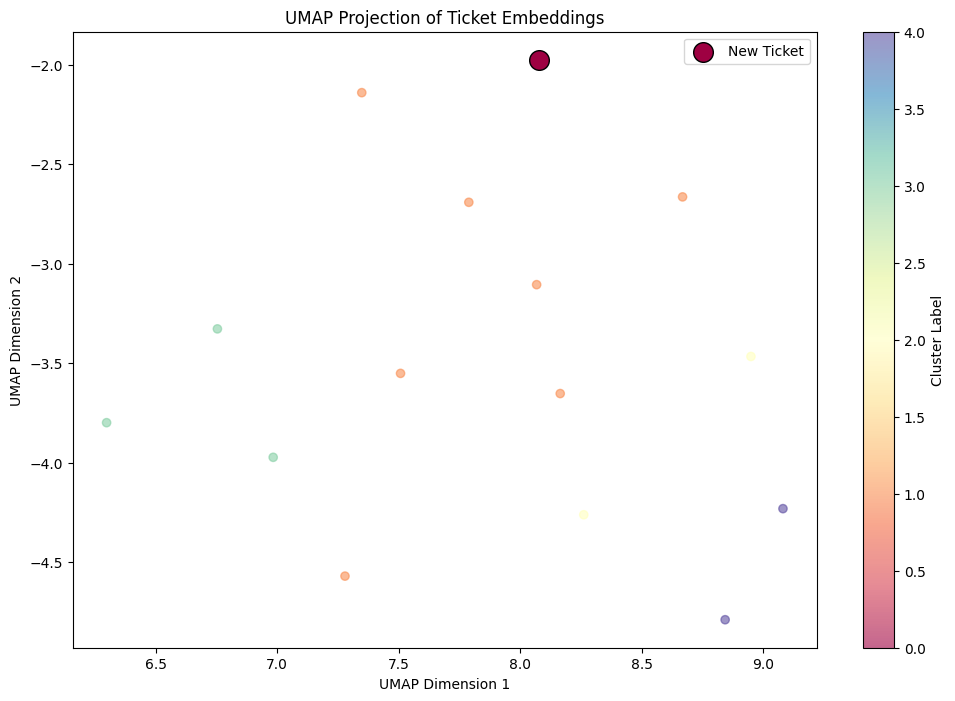

In [150]:
def visualize_with_umap(embeddings, labels, new_ticket_index):
    # Set up UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
    embedding_2d = reducer.fit_transform(embeddings)

    # Creating the plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels, cmap='Spectral', alpha=0.6)

    # Get color of the new ticket based on its cluster label
    color_of_new_ticket = scatter.cmap(scatter.norm(labels[new_ticket_index]))

    # Highlight the new ticket
    plt.scatter(embedding_2d[new_ticket_index, 0], embedding_2d[new_ticket_index, 1],
                c=[color_of_new_ticket],  # Use the same color as its cluster
                edgecolor='black',  # Black border for emphasis
                s=200,  # Larger size
                zorder=5,
                label='New Ticket')  # Label for the legend

    # Adding a legend, title and color bar
    plt.colorbar(scatter, label='Cluster Label')
    plt.legend(title='', loc='best')  # Add a title to the legend
    plt.title('UMAP Projection of Ticket Embeddings')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()

# Example usage:
new_ticket_index = df.index[-1]  # Assuming the new ticket was added last
labels = df['kmeans_label'].to_numpy()  # Ensure this column is up-to-date

visualize_with_umap(embeddings, labels, new_ticket_index)


In [151]:

# Replace 'api key' with your actual Groq API key
#client = Groq(api_key="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")



groq_key = os.getenv('GROQ_KEY')
client = Groq(api_key=groq_key)


detailed_instructions = ("You are a highly capable technical supporter. For each issue, provide a summary "
                          "categorized under the following headers:\n"
                          "- Issue: [Specify the type of issue e.g., Support, IT-Systems, Development]\n"
                          "- Affected Systems: [List affected systems e.g., VDI, Email Servers, etc.]\n"
                          "- Reported Problem: [Describe the reported problem e.g., no connection, slow performance, etc.]")

ticket_text = "[MBA#1128940] Zimbra St\u00f6rung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht. Guten Morgen    Ich habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon.    Die Kantonsschule Wiedikon w\u00fcnscht eine Layout Anpassung f\u00fcr mobile Ger\u00e4te zu machen f\u00fcr das Video welches auf der Webseite der KWI Baustand der Hohlstrasse hochgeladen wurde. Die Kontaktperson bei fr\u00fcheren Anpassungen bei euch war Noemi Schmid. Die Schule w\u00fcnscht nun eine Kontaktaufnahme von euch  mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen.  W\u00e4re eine Kontaktaufnahme seitens von euch m\u00f6glich?    Dieses Ticket eilt ein wenig da es schon l\u00e4nger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne R\u00fcckmeldung bis jetzt.     Freundliche Gr\u00fcsse  Kushtrim Veliji    Bildungsdirektion Kanton Z\u00fcrich  Mittelschul und Berufsbildungsamt  Digital Service Center Sek II  Ausstellungsstrasse 80  8090 Z\u00fcrich  Telefon 043 259 77 27"

chat_completion = client.chat.completions.create(
                messages=[
                {"role": "system", "content": detailed_instructions},
                {"role": "user", "content": ticket_text}
            ],
    model="llama3-70b-8192"
)

print("\n***************** ANTWORT **********************\n", chat_completion.choices[0].message.content)



***************** ANTWORT **********************
 Here is the summary of the issue:

**Issue:** Support

**Affected Systems:** Email Servers (kslzh.ch)

**Reported Problem:** The Kantonsschule Wiedikon is experiencing issues with sending and receiving emails, and the email system is not functioning.

**Additional Information:** The ticket also includes a separate request for a layout adjustment for mobile devices for a video on the KWI Baustand der Hohlstrasse website. The contact person for this request is Philippe da Silva Wong.
